## Time-Based Key-Value Store
#### Difficulty: Medium

Design a time-based key-value data structure that can store multiple values for the same key at different time stamps and retrieve the key's value at a certain timestamp.

Implement the `TimeMap` class:

`TimeMap()` Initializes the object of the data structure.
`void set(String key, String value, int timestamp)` Stores the key `key` with the value `value` at the given time `timestamp`.
String `get(String key, int timestamp)` Returns a value such that `set` was called previously, with `timestamp_prev` <= `timestamp`. If there are multiple such values, it returns the value associated with the largest `timestamp_prev`. If there are no values, it returns `""`.
 

Example 1:

- Input 
["TimeMap", "set", "get", "get", "set", "get", "get"]

[[], ["foo", "bar", 1], ["foo", 1], ["foo", 3], ["foo", "bar2", 4], ["foo", 4], ["foo", 5]]

- Output
[null, null, "bar", "bar", null, "bar2", "bar2"]

Explanation
- TimeMap timeMap = new TimeMap();
- timeMap.set("foo", "bar", 1);  // store the key "foo" and value "bar" along with timestamp = 1.
- timeMap.get("foo", 1);         // return "bar"
- timeMap.get("foo", 3);         // return "bar", since there is no value corresponding to foo at timestamp 3 and timestamp 2, then the only value is at timestamp 1 is "bar".
- timeMap.set("foo", "bar2", 4); // store the key "foo" and value "bar2" along with timestamp = 4.
- timeMap.get("foo", 4);         // return "bar2"
- timeMap.get("foo", 5);         // return "bar2"
 

Constraints:

- 1 <= `key.length`, `value.length` <= 100
- `key` and `value` consist of lowercase English letters and digits.
- 1 <= `timestamp` <= 10<sub>7</sub>
- All the timestamps `timestamp` of `set` are strictly increasing.
- At most 2 * 10<sub>5</sub> calls will be made to `set` and `get`.

Link to problem: https://leetcode.com/problems/search-in-rotated-sorted-array

In [ ]:
# Solution 1: Straightforward class creation, hard part comes in get() method.
# Uses Binary search to find the max timestamp (since timestamps are monotonic)
# Returns the value at the max timestamp
# Performs well (runtimes are met), problem is solved, but it is not fully optimized.
class TimeMap:
    def __init__(self):
        # To store all keys
        self.store = {}
         
    def set(self, key: str, value: str, timestamp: int) -> None:
        # If empty, create entry for key
        if key not in self.store:
            self.store[key] = []
        
        # Append entry to correlating key
        self.store[key].append((timestamp, value))     

    def get(self, key: str, timestamp: int) -> str:
        # Get the array of data stored at key
        data = self.store.get(key, []) 
        
        # Find max with binary search
        l, r = 0, len(data)-1
        result = ""

        while l <= r:
            mid = (l+r)//2
            time, val = data[mid]

            if time > timestamp:
                r = mid - 1
            else:
                result = val
                l = mid + 1

        return result

Results:

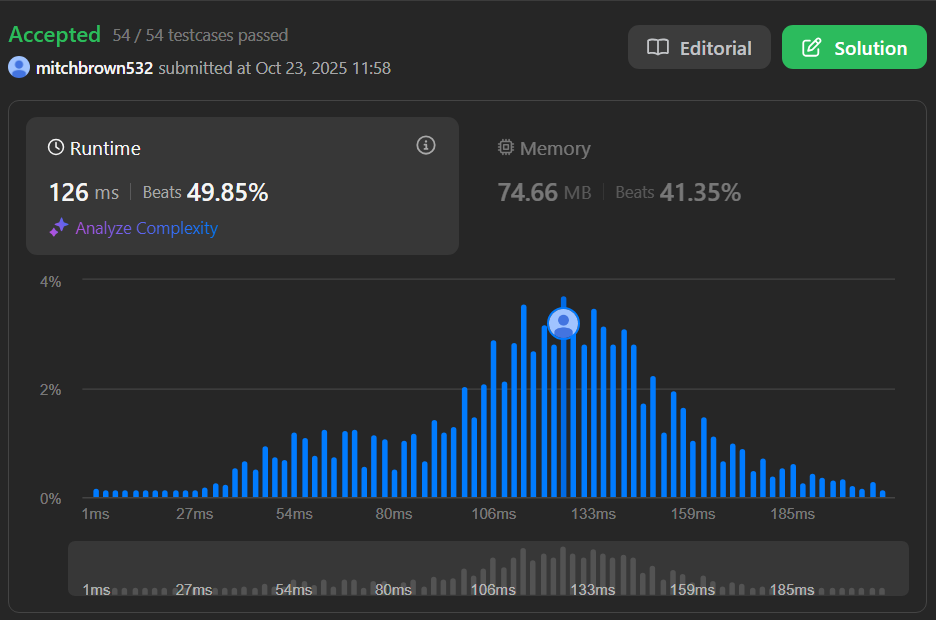

In [ ]:
# Solution 2: Very similar logic to solution 1.
# Optimizes by using Bisect (C-implemented)
# 2 lists to prevent per item overhead (no tuple unpacking required)
# Although it uses the same logic, this performs much better (77ms faster and 4 less MB - both within top 4%)
from bisect import bisect_right
from collections import defaultdict

class TimeMap:
    def __init__(self):
        # Each key keeps two aligned lists: timestamps and values
        self.times = defaultdict(list)
        self.vals = defaultdict(list)

    def set(self, key: str, value: str, timestamp: int) -> None:
        self.times[key].append(timestamp)
        self.vals[key].append(value)

    def get(self, key: str, timestamp: int) -> str:
        time_list = self.times.get(key)
        if not time_list:                           # faster than .get(key, [])
            return ""
        i = bisect_right(time_list, timestamp) - 1  # rightmost times <= timestamp
        return self.vals[key][i] if i >= 0 else ""

Results:

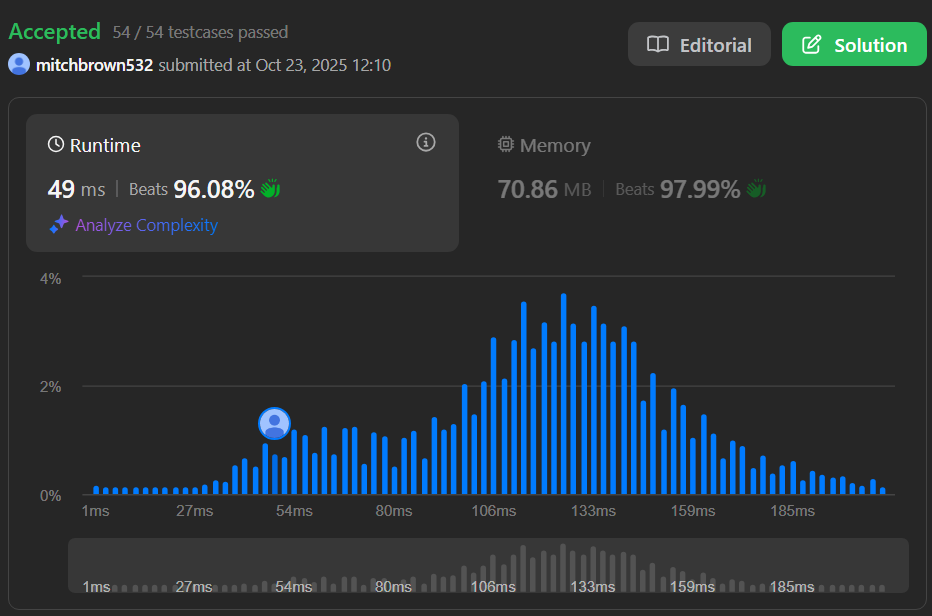